## Predicción sobre los precios de las acciones de Google

**Autor: Luis Fernando Apáez Álvarez**


#### Índice

<ul>
    <a href="#p1"><li>Descripción</li></a>
    <a href="#p2"><li>Regresión lineal múltiple</li></a>
    <a href="#p3"><li>Redes neuronales (MLP)</li></a>
</ul>

---

### Descripción <a id="p1"></a>

Implementaremos dos modelos predictivos para predecir el precio de apertura de las acciones de Google, para lo cual utilizaremos como datos los precios históricos del primero de enero del 2016 al 31 de octubre del 2022. Dichos modelos a utilizar son:

* Modelo predictivo de regresión lineal múltiple.
* Redes neuronales (MLP).

De tal manera, comenzamos por realizar las importaciones necesarias y la carga de los datos

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use('seaborn')

# Instanciamos y configuramos la clave de google
goog = yf.Ticker('goog')

# Obtenemos la informacion
data = goog.history(interval='1d', start='2016-01-01', end='2022-10-31')
data = data.reset_index()
# Damos un vistazo
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2016-01-04,37.150002,37.202999,36.562901,37.091999,65456000,0,0.0
1,2016-01-05,37.322498,37.599998,36.931999,37.129002,39014000,0,0.0
2,2016-01-06,36.500000,37.359001,36.445999,37.181000,38940000,0,0.0
3,2016-01-07,36.515499,36.924999,35.952999,36.319500,59274000,0,0.0
4,2016-01-08,36.572498,36.661499,35.650002,35.723499,49018000,0,0.0


No consideraremos las últimas tres columnas

In [2]:
data = data[["Date", "Open", "High", "Low", "Close"]]

Realicemos un gráfico de líneas de la serie de tiempo

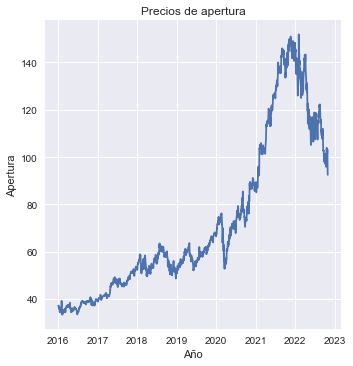

In [3]:
# Estilo de graficación
plt.style.use('seaborn')

g = sns.relplot(data=data, x='Date', y='Open', 
            # cambiamos ahora a kind='line'
            kind='line')
g.set(title="Precios de apertura",
     xlabel="Año",
     ylabel="Apertura")
plt.show()

### Regresión lineal múltiple <a id="p2"></a>

Implementaremos ahora un modelo predictivo de regresión lineal múltiple donde la variable objetivo serán los precios de apertura y las variables regresoras son: ``High, Low, Close``.

De tal manera

In [3]:
# Importaciones necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Instanciamos
reglin = LinearRegression()

# Definimos las variables
X = data[["High", "Low", "Close"]].values
y = data["Open"].values.reshape(-1, 1)

# Realizamos la division de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.25,
                                                   random_state=123)

# Ajustamos (entrenamos)
reglin.fit(X_train, y_train)

LinearRegression()

Una vez entrenado el modelo lo evaluaremos:

In [6]:
# Importaciones necesarias
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Realizamos las predicciones de la variable "y" sobre el conjunto de pruebas
y_pred = reglin.predict(X_test)

# error cuadratico medio
mse = mean_squared_error(y_pred, y_test)

# R^2
r2 = r2_score(y_pred, y_test)

# veamos
print(f'mse = {mse}\nR^2 = {r2}')

mse = 0.2543128419391346
R^2 = 0.9997851754057291


Obtenemos un buen valor de la $R^{2}$, lo que nos indicaría que el modelo obtenido es bastante bueno. De hecho, veamos lo valores reales en ``y_test`` y comparémoslos con los valores predichos en ``y_pred``

In [6]:
# Dataframe con la informacion
df_info = pd.DataFrame(y_pred).rename(columns = {0: 'y_pred'})
df_info['y_test'] = y_test
df_info = df_info.reset_index()

# Calculamos las diferencias absolutas entre los valores reales y los predichos
df_info['diff'] = abs(df_info.y_pred - df_info.y_test)

# Calculamos el porcentaje de error para cada fila
df_info['error (%)'] = (df_info['diff'] * 100) / df_info['y_test']
df_info.head()

,index,y_pred,y_test,diff,error (%)
0,0,103.062358,103.360497,0.298139,0.288446
1,1,76.228438,75.516998,0.711439,0.942092
2,2,127.287284,126.550003,0.737281,0.582601
3,3,86.883112,86.525002,0.358111,0.413881
4,4,49.565408,49.588501,0.023093,0.046570


A simple vista notamos que los errores porcentuales de las predicciones respecto a los valores reales son muy bajos. De manera general:

In [7]:
df_info["error (%)"].describe()

count    430.000000
mean       0.450536
std        0.370281
min        0.000987
25%        0.192404
50%        0.377814
75%        0.624092
max        3.089066
Name: error (%), dtype: float64

* El error promedio es muy bajo (0.43 %).
* Obtuvimos una predicción muy buena, donde el error fue de tan solo el 0.0025%.
* El 75% de los errores fueron menores o iguales a 0.62%, lo que nos dice que en general el modelo realizó buenas predicciones.
* El modelo no fue tan bueno, al menos, en una predicción al errar en un 3% del valor real.

Gráficamente podemos comparar los valores reales de los predichos:

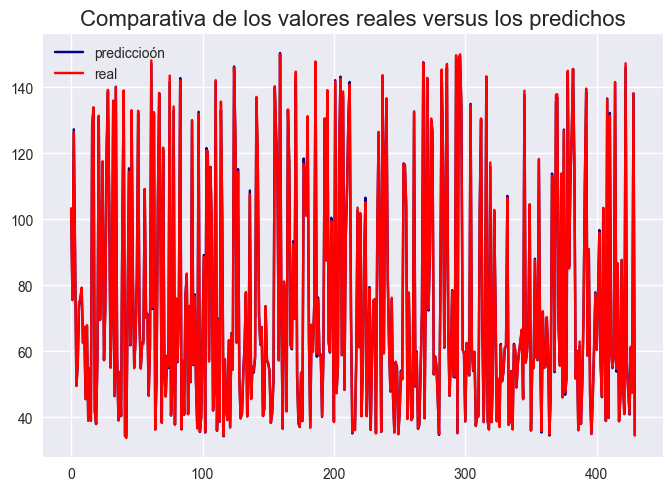

In [24]:
plt.plot(df_info.index, df_info.y_pred, color='darkblue', label='prediccioón')
plt.plot(df_info.index, df_info.y_test, color='red', label='real')
plt.title("Comparativa de los valores reales versus los predichos", size=16)
plt.legend()
plt.show()

Notamos que las diferencias son muy pequeñas de modo que, en efecto, el modelo obtenido es muy bueno.

Veamos la comparación de las últimas observaciones:

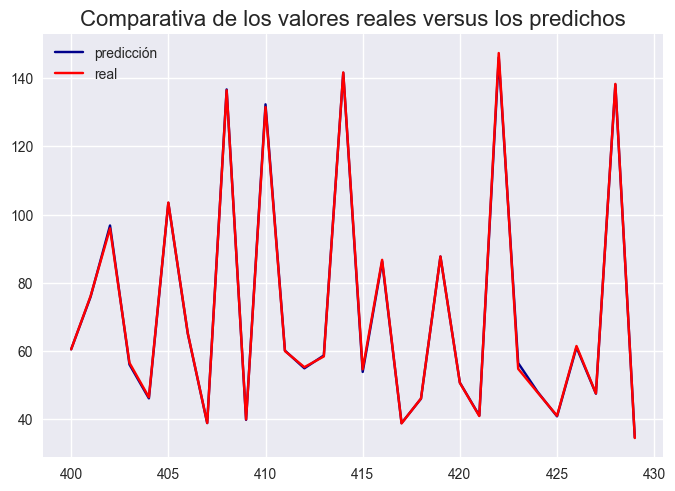

In [25]:
plt.plot(df_info.iloc[400:len(df_info)]["index"], 
         df_info.iloc[400:len(df_info)]["y_pred"], 
         color='darkblue', label='predicción')
plt.plot(df_info.iloc[400:len(df_info)]["index"], 
         df_info.iloc[400:len(df_info)]["y_test"], 
         color='red', label='real')
plt.title("Comparativa de los valores reales versus los predichos", size=16)
plt.legend()
plt.show()

Lo que hemos conseguido con el modelo anterior es realizar un excelente ajuste al comportamiento general de los datos de la serie de tiempo. 

Ahora bien, si buscamos realizar predicciones futuras deberemos realizar algunas modificaciones en específico. La idea será utilizar los precios de ``High, Low, Close`` de un día $t$, para predecir el precio de ``Open`` del día siguiente ($t+1$). 

#### Predicciones

Implementando un modelo como el anterior, realizaremos la predicción del precio de apertura del día siguiente. Para ello desfasaremos los datos en un día:

In [7]:
# Los precios de apertura parten del indice 1 (omitimos la primera
# observacion de indice 0)
data_p = pd.DataFrame(data.loc[1:1718, "Open"]).reset_index()

# El resto de la informacion parte del primer indice, pero no contempla
# el ultimo
data_p["High"] = data.loc[0:1717, "High"]
data_p["Low"] = data.loc[0:1717, "Low"]
data_p["Close"] = data.loc[0:1717, "Close"]
data_p = data_p.drop("index", axis=1)
data_p

,Open,High,Low,Close
0,37.322498,37.202999,36.562901,37.091999
1,36.500000,37.599998,36.931999,37.129002
2,36.515499,37.359001,36.445999,37.181000
3,36.572498,36.924999,35.952999,36.319500
4,35.830502,36.661499,35.650002,35.723499
...,...,...,...,...
1713,102.089996,101.620003,98.230003,101.480003
1714,103.300003,103.099998,100.300003,102.970001
1715,96.760002,105.099998,103.019997,104.930000
1716,94.309998,98.540001,94.570000,94.820000


De tal manera, por ejemplo, los valores de ``High, Low, Close`` de la última fila tiene asociados el valor de ``Open`` del día siguiente.

Lo que sigue es implementar el mismo modelo de regresión lineal a cómo lo hicimos antes

In [8]:
# Instanciamos
reglin_2 = LinearRegression()

# Definimos las variables
X_2 = data_p[["High", "Low", "Close"]].values
y_2 = data_p["Open"].values.reshape(-1, 1)

# Realizamos la division de los datos
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2,
                                                   test_size=0.25,
                                                   random_state=123)

# Ajustamos (entrenamos)
reglin_2.fit(X_train_2, y_train_2)

# Realizamos las predicciones de la variable "y" sobre el conjunto de pruebas
y_pred_2 = reglin_2.predict(X_test_2)

# error cuadratico medio
mse = mean_squared_error(y_pred_2, y_test_2)

# R^2
r2 = r2_score(y_pred_2, y_test_2)

# veamos
print(f'mse = {mse}\nR^2 = {r2}')

mse = 0.7872634840561122
R^2 = 0.9993266842527836


Notamos que el _mse_ aumento respecto al obtenido en modelo ``reglin`` y que el valor de la $R^{2}$ disminuyó un poco, no obstante, aún así el modelo es muy bueno.

Podemos crear de nuevo un dataframe informativo

In [9]:
# Dataframe con la informacion
df_info_2 = pd.DataFrame(y_pred_2).rename(columns = {0: 'y_pred'})
df_info_2['y_test'] = y_test_2
df_info_2 = df_info_2.reset_index()

# Calculamos las diferencias absolutas entre los valores reales y los predichos
df_info_2['diff'] = abs(df_info_2.y_pred - df_info_2.y_test)

# Calculamos el porcentaje de error para cada fila
df_info_2['error (%)'] = (df_info_2['diff'] * 100) / df_info_2['y_test']
df_info_2.head()

,index,y_pred,y_test,diff,error (%)
0,0,101.424538,101.168503,0.256035,0.253078
1,1,75.947118,75.782997,0.164121,0.216567
2,2,126.972988,126.550003,0.422985,0.334243
3,3,88.379394,88.644501,0.265107,0.299067
4,4,49.650529,49.299999,0.350530,0.711014


In [11]:
df_info_2.describe()["error (%)"]

count    430.000000
mean       0.674820
std        0.879015
min        0.000615
25%        0.189228
50%        0.413420
75%        0.808264
max        7.652582
Name: error (%), dtype: float64

donde, en este caso, el error porcentual medio fue de 0.67%; el 75% de los errores fueron menores o iguales al 0.8%, que nos estaría diciendo que el modelo es muy bueno.

Y graficamos

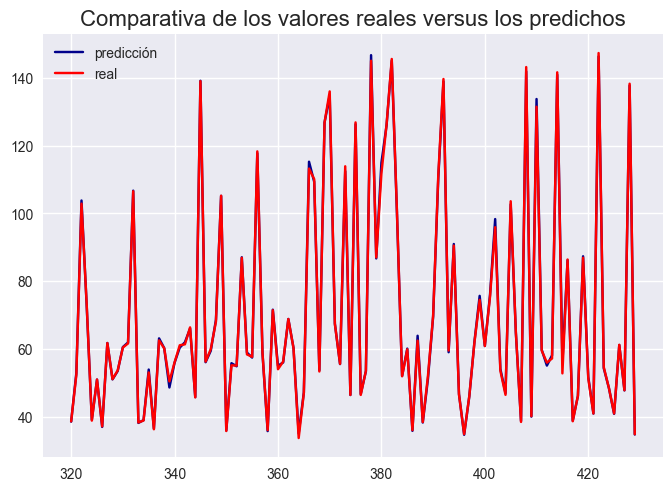

In [26]:
plt.plot(df_info_2.iloc[320:len(df_info_2)]["index"], 
         df_info_2.iloc[320:len(df_info_2)]["y_pred"], 
         color='darkblue', label='predicción')
plt.plot(df_info_2.iloc[320:len(df_info_2)]["index"], 
         df_info_2.iloc[320:len(df_info_2)]["y_test"], 
         color='red', label='real')
plt.title("Comparativa de los valores reales versus los predichos", size=16)
plt.legend()
plt.show()

Ahora bien, recordemos utilizamos los valores de ``Close, Low, High`` de la última fila del dataframe ``data``

In [14]:
data.tail(1)

,Date,Open,High,Low,Close
1718,2022-10-28,92.529999,96.860001,92.322998,96.580002


De tal manera, con dichos valores predeciremos el precio de ``Open`` para el día siguiente del 28 de octubre del 2022. Así

In [15]:
# Definimos los valores nuevos de las variables regresoras
X_new = data.loc[1718, ["High", "Low", "Close"]].values.reshape(1, 3)

# Predecimos utilizando el modelo reglin_2
y_pred_new = reglin_2.predict(X_new)

# Veamos
y_pred_new

array([[96.43814595]])

El precio de apertura para el día siguiente del 28 de octubre del 2022 es de **$96.43814595**. Veamos qué tan buena fue dicha predicción, para lo cual

In [16]:
# Obtenemos la informacion
data_n = goog.history(interval='1d', start='2022-10-31', end='2022-11-05')
data_n = data_n.reset_index()

# Damos un vistazo
data_n

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-10-31,95.779999,96.349998,94.379997,94.660004,29868700,0,0
1,2022-11-01,95.589996,96.165001,90.430000,90.500000,43220600,0,0
2,2022-11-02,90.910004,91.300003,87.010002,87.070000,43553600,0,0
3,2022-11-03,86.345001,86.550003,83.449997,83.489998,48510400,0,0
4,2022-11-04,85.510002,86.730003,83.879997,86.699997,40173300,0,0


de donde

In [17]:
error = ((96.43814595 - 95.779999) * 100) / 95.779999
print(f'Valor real: {95.779999}\nValor predicho: {96.43814595}\nError: {round(error, 2)}%')

Valor real: 95.779999
Valor predicho: 96.43814595
Error: 0.69%


Lo que sigue es aplicar exactamente lo que hicimos antes pero ahora utilizaremos una red neuronal MLP en vez del modelo de regresión lineal múltiple.

### Redes neuronales <a id="p3"></a>

Utilizaremos exactamente la misma partición de los datos que se emplearon en el modelo ``reglin_2``. Luego, definiremos la arquitectura de la red neuronal, donde definiremos una función y buscaremos hallar los parámetros de la misma para obtener un mejor modelo. 

In [74]:
# Importaciones necesarias
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

# Funcion con la arquitectura de la red neuronal y el entrenamiento de la misma
def modelo(n1, n2, activacion, epocas, boolean, lote):
    """
    n1: número de neuronas en la primer capa
    n2: número de neuronas en la segunda capa
    activacion: función de activación en la última capa
    epocas: número de épocas
    boolean: booleano para determinar el valor de verbose
    lote: tamañio del lote en el entrenamiento
    """
    # Instanciamos el modelo
    model = Sequential()
    
    # Capa de entrada de 1 neurona y capa oculta de n1 neuronas.
    # Para la capa oculta utilizamos la funcion de activacion relu.
    # La forma de entrada es de 3 (Close, Low y High). 
    model.add(Dense(n1, activation='relu', input_shape=(3,)))
    
    # Capa oculta 2:
    # n2 neuronas y funcion de activacion relu
    model.add(Dense(n2, activation='relu'))
    
    # Capa de salida con funcion de activacion "activacion"
    model.add(Dense(1, activation=activacion))
    
    # Compilacion. Utilizaremos ahora el error cuadratico medio como
    # funcion de perdida
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Entrenamiento
    # Guardaremos el mejor modelo obtenido en el entrenamiento
    fname = "Prediccion1.hdf5"
    checkpoint = ModelCheckpoint(fname, monitor="loss", mode="min", 
                                 save_best_only=True, verbose=1)
    modelo = model.fit(X_train_2, y_train_2, epochs=epocas, verbose = boolean,
                      batch_size=lote, callbacks=[checkpoint])
    
    # prediccion
    y_pred = model.predict(X_test_2)
    
    # dataframe con la informacion
    df = pd.DataFrame(y_pred).rename(columns = {0: 'y_pred'})
    df['y_test'] = y_test_2
    df = df.reset_index()
    df['diff'] = abs(df.y_pred - df.y_test)
    df['error'] = (df['diff'] * 100) / df['y_test']
    
    # estadisticas
    df_stats = df.describe()
    
    # Grafico comparativo
    plt.plot(df.index, df.y_pred, color='blue', label='prediccioón')
    plt.plot(df.index, df.y_test, color='red', label='real')
    plt.legend(loc="upper left")
    plt.grid()
    plt.show()
    
    # hacemos que la funcion retorne 4 valores
    return modelo, df, df_stats, model

Después de probrar con diferentes valores de los parámetros de la función ``modelo()``, obtenemos un buen modelo con los parámetros que siguen:

Epoch 1/15
41/65 [=================>............] - ETA: 0s - loss: 1020.5946 
Epoch 1: loss improved from inf to 656.60999, saving model to Prediccion1.hdf5
65/65 [==============================] - 1s 3ms/step - loss: 656.6100
Epoch 2/15
38/65 [================>.............] - ETA: 0s - loss: 2.0194
Epoch 2: loss improved from 656.60999 to 1.63441, saving model to Prediccion1.hdf5
65/65 [==============================] - 0s 3ms/step - loss: 1.6344
Epoch 3/15
38/65 [================>.............] - ETA: 0s - loss: 0.7583
Epoch 3: loss improved from 1.63441 to 0.98415, saving model to Prediccion1.hdf5
65/65 [==============================] - 0s 3ms/step - loss: 0.9842
Epoch 4/15
44/65 [===================>..........] - ETA: 0s - loss: 1.0660
Epoch 4: loss improved from 0.98415 to 0.97479, saving model to Prediccion1.hdf5
65/65 [==============================] - 0s 2ms/step - loss: 0.9748
Epoch 5/15
39/65 [=================>............] - ETA: 0s - loss: 0.9098
Epoch 5: loss did not i

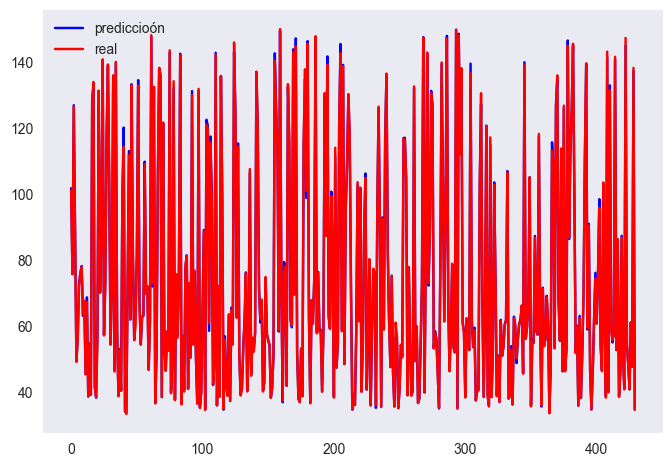

In [80]:
modelo1, df1, df_stats1, model1 = modelo(40, 25, 'relu', 15, True, 20)

Veamos el dataframe que contiene las estadísticas referentes a las predicciones sobre el conjunto ``X_test_2``:

In [61]:
df_stats1

,index,y_pred,y_test,diff,error
count,430.000000,430.000000,430.000000,430.000000,430.000000
mean,214.500000,74.419403,74.693509,0.639591,0.804254
std,124.274562,34.015656,34.251495,0.767633,0.865356
min,0.000000,33.896660,33.549999,0.001732,0.001767
25%,107.250000,48.777035,49.193501,0.151802,0.274921
50%,214.500000,61.130905,61.377750,0.332363,0.563471
75%,321.750000,100.337612,100.985001,0.873917,1.011103
max,429.000000,148.943329,150.000000,5.230316,7.804659


Notamos que el error promedio fue de 0.8%; el error máximo fue de 7.8%; el error mínimo de 0.001%. Notamos que el 75% de los errores fueron menores o iguales al 1.01%, lo que nos dice que el modelo obtenido fue muy bueno. Comparamos los resultados anteriores con los obtenidos en el modelo ``reglin_2``:

In [83]:
df_info_2.describe()["error (%)"]

count    430.000000
mean       0.674820
std        0.879015
min        0.000615
25%        0.189228
50%        0.413420
75%        0.808264
max        7.652582
Name: error (%), dtype: float64

Lo que nos dice que el modelo de la regresión lineal múltiple fue mejor que el obtenido con redes neuronales. De hecho

In [84]:
# Cargamos el mejor modelo obtenido en el entrenamiento:
# Importacion necesaria
from keras.models import load_model
modelo_result = load_model('Prediccion1.hdf5')

# Hacemos las predicciones sobre el conjunto de prueba
y_pred_redes = modelo_result.predict(X_test_2)

# Error cuadratico medio
mse = mean_squared_error(y_pred_redes, y_test_2)

# R^2
r2 = r2_score(y_pred_redes, y_test_2)

# veamos
print(f'mse = {mse}\nR^2 = {r2}')

14/14 [==============================] - 0s 1ms/step
mse = 0.887273651312835
R^2 = 0.9992398900918882


En comparativa con los valores obtenidos de la regresión lineal:

```
mse = 0.7872634840561122
R^2 = 0.9993266842527836
```

En realidad podemos ver que ambos modelos son muy buenos. 

Lo que sigue es realizar la predicción del precio de apertura del día siguiente:

In [87]:
# Importacion necesaria
import numpy as np

# Cambiamos el tipo de dato de X_new
X_new_r = np.asarray(X_new).astype(np.float32)

# Realizamos la prediccion
prediccion_t = modelo_result.predict(X_new_r)[0][0]
prediccion_t

1/1 [==============================] - 0s 20ms/step


95.48425

In [88]:
error = (abs(prediccion_t - 95.779999) * 100) / 95.779999
print(f'Valor real: {95.779999}\nValor predicho: {prediccion_t}\nError: {round(error, 2)}%')

Valor real: 95.779999
Valor predicho: 95.4842529296875
Error: 0.31%


En comparativa con

```
Valor real: 95.779999
Valor predicho: 96.43814595
Error: 0.69%
```

En este caso, obtuvimos una mejor predicción utilizando el modelo de red neuronal.

In [53]:
# Codigo para guardar el modelo
model1.save('Prediccion1_1.h5')